In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

In [97]:
x = np.random.random((1000,))*10

lineCoeffs = np.array([1, 2])

prob = 0.1

weirdNoise = np.array([(np.random.random())*10 if np.random.random() < prob else 0. for _ in range(x.shape[0])])
realY = lineCoeffs[0] * x + lineCoeffs[1]
yNoise = realY + np.random.normal(0, 1, x.shape) + weirdNoise



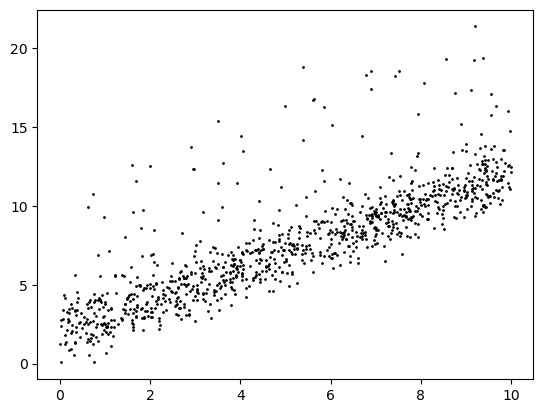

In [98]:
plt.scatter(x, yNoise, s = 1, c='black')

Проведём прямую

In [99]:
from sklearn.linear_model import LinearRegression, Ridge

In [100]:
x = x.reshape(-1, 1)

In [101]:
regressor = RANSACRegressor().fit(x, yNoise)
y_predicted = regressor.predict(x)

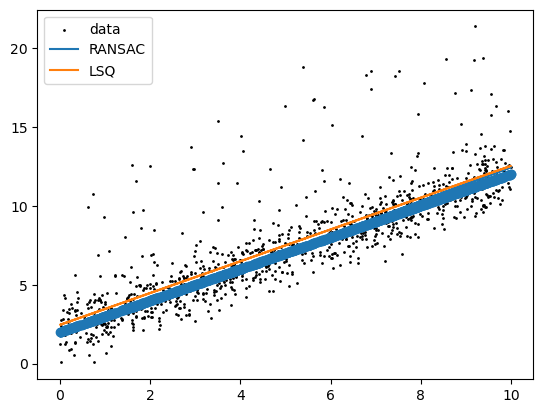

In [102]:
plt.scatter(x, yNoise, s=1, label='data', c='black')
plt.plot(x, y_predicted, label='RANSAC')
plt.plot(x, LinearRegression().fit(x,yNoise).predict(x), label='LSQ')
plt.scatter(x, realY, s = 1, color = 'red')
plt.legend()

### ДЗ: шумный круг

In [103]:
r = 1
sigma = 1e-1
size = 1000
target = np.empty((size, 2))

angle = np.random.random((size,))*2*np.pi

target[:, 0] = np.cos(angle) + np.random.normal(0, sigma, (size, ))
target[:, 1] = np.sin(angle) + np.random.normal(0, sigma, (size, ))

(-1.1, 1.1)

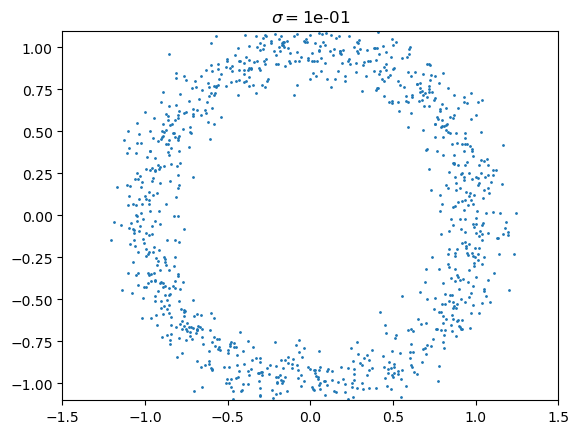

In [104]:
plt.scatter(target[:,0], target[:,1], 1)
plt.title(f"$\sigma=${sigma:.0e}")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.1, 1.1)

In [105]:
from regModel import Regression

In [106]:
regression = Regression(learning_rate=1e-1,max_iter=1000, early_stop_eps=1e-3)


In [107]:
trData = np.array([[phi] for phi in angle])
regression.fit(trData, target)

In [108]:
predicted = regression.predict(angle)

(-1.1, 1.1)

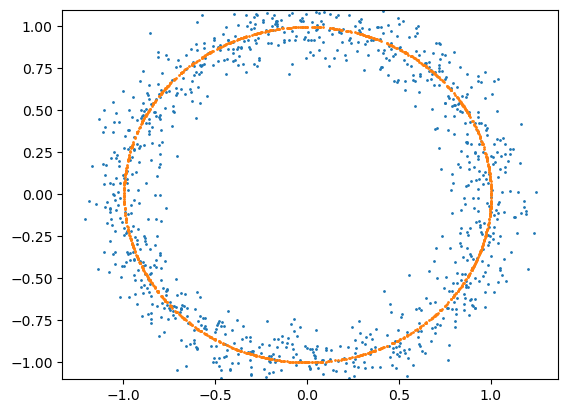

In [109]:
plt.scatter(target[:, 0], target[:, 1], 1, label='эксп. данные')
plt.scatter(predicted[:, 0], predicted[:,1], 1, label='предсказание')
plt.ylim(-1.1, 1.1)

In [110]:
print('predicted:')
print(f'radius: {regression.R:.4f}')
print(f'center: ({regression.C[0]:.4f}, {regression.C[1]:.4f})')

predicted:
radius: 0.9984
center: (0.0040, -0.0008)
